
# Project Summary: Singapore Bank Stock Analysis Tool

This project aims to develop a web application using Streamlit for analyzing and predicting the stock performance of major Singaporean banks—DBS, OCBC, and UOB. By leveraging data analytics, machine learning, and financial modeling, the tool provides insights into stock price movements and market trends, helping address key challenges faced by investors and analysts.

The application offers a user-friendly interface for anyone to make data-driven decisions based on a blend of technical, fundamental, and macroeconomic analyses.

## Data Extraction and Exploratory Data Analysis (EDA)

This project involves extracting financial and market data for Singapore banks (DBS, OCBC, and UOB), performing data processing and Exploratory Data Analysis (EDA), and preparing the data for subsequent machine learning modeling to predict future market movements.

Data Extraction:
Sources: Data is extracted from Yahoo Finance using the yfinance library, which provides historical market data, technical indicators, and dividends.

Data Collected:
OHLC Data: Includes Open, High, Low, Close, and Adjusted Close prices, along with trading volume.
Technical Indicators: Calculated indicators such as the 50-day and 200-day moving averages, and the Relative Strength Index (RSI).

#### Contents

1. [Import Libraries and Data](#Import-Libraries-and-Data)
2. [Calculate moving averages](#Calculating-50-day-and-200-day-moving-averages)
3. [Extract dividends data](#Extract-dividends-data-from-yfinance)
4. [Extract historical price](#Extract-Historical-Price)
5. [Merge DataFrame](#Merge-Dataframe)
6. [Exploratory Data Analysis 1](#Exploratory-Data-Analysis;-Moving-Average)
7. [Exploratory Data Analysis 2](#Exploratory-Data-Analysis;-Relative-Strength-Index)
8. [Exploratory Data Analysis 3](#Exploratory-Data-Analysis;-Time-Series-Decomposition-and-Analysis)




## Import Libraries and Data

In [1]:
import yfinance as yf
import pandas as pd

In [2]:
# Define the ticker and the time period
ticker = "D05.SI"
data = yf.download(ticker, start="2018-01-01", end="2024-08-17", interval="1d")


[*********************100%%**********************]  1 of 1 completed


## Calculate Moving Averages

This section of the code calculates the 50-day and 200-day moving averages (MA) for the closing prices and adjusts the data to a monthly frequency. The moving averages are useful for identifying trends and potential support or resistance levels in the stock price over time.

In [3]:
# Calculate the 50-day and 200-day moving averages
data['50_day_MA'] = data['Close'].rolling(window=50).mean()
data['200_day_MA'] = data['Close'].rolling(window=200).mean()

# Keep only the last entry of each month
monthly_data = data.resample('M').last()

# Change the dates to the start date of each month
monthly_data.index = monthly_data.index.to_period('M').to_timestamp('S')

# Keep only the '50_day_MA' and '200_day_MA' columns
monthly_data = monthly_data[['50_day_MA', '200_day_MA']]

## Extract Dividends Data

This section of the code extracts dividend data for the specific stock from Yahoo Finance using the yfinance library. The data is then processed to match a monthly frequency, making it suitable for merging with other monthly datasets.

In [4]:
# Get the dividends data from Yahoo Finance
dividends = yf.Ticker(ticker).dividends

# Filter dividends data for the specified date range
dividends = dividends.loc['2018-01-01':'2024-08-01']

# Convert the Series to a DataFrame and reset the index to have 'Date' and 'Dividends' columns
dividends_df = dividends.reset_index()

# Rename the columns to be clear
dividends_df.columns = ['Date', 'Dividends']

# Convert 'Date' column to datetime format and set dates to the start of each month
dividends_df['Date'] = pd.to_datetime(dividends_df['Date']).dt.to_period('M').dt.to_timestamp() + pd.offsets.MonthBegin(0)

# Drop duplicate rows based on the 'Date' column
dividends_df = dividends_df.drop_duplicates(subset=['Date'])


C:\Users\fauzi\AppData\Local\Temp\ipykernel_159820\2024279361.py:14: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  dividends_df['Date'] = pd.to_datetime(dividends_df['Date']).dt.to_period('M').dt.to_timestamp() + pd.offsets.MonthBegin(0)


## Extract Historical Price 

This section of the code focuses on extracting stock price data for the particular stock from Yahoo Finance and calculating the Relative Strength Index (RSI) to evaluate the momentum of the stock over time.


In [5]:
# Define the ticker and the time period
ticker = "D05.SI"
df = yf.download(ticker, start="2018-01-01", end="2024-08-01", interval="1mo")

# Extract the relevant columns
price = df[['High', 'Low', 'Open', 'Close']]

[*********************100%%**********************]  1 of 1 completed


#### RSI Overview: 

The RSI is a momentum oscillator that measures the speed and change of price movements. It oscillates between 0 and 100, indicating overbought conditions when above 70 and oversold conditions when below 30.


In [6]:
# Calculate the RSI
def calculate_rsi(data, window=14):
    # Calculate price differences
    delta = df['Close'].diff()

    # Separate positive and negative gains
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()

    # Calculate RS and RSI
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    
    return rsi
# Compute the RSI using the closing prices
df['RSI'] = calculate_rsi(data)

## Merge Dataframe

This section of the code merges various datasets to create a comprehensive DataFrame that combines stock prices, moving averages, and dividend data.

By merging these datasets, the code creates a unified, time-aligned dataset that captures a broad spectrum of market and financial metrics, supporting a comprehensive analysis and predictive modeling approach.

In [7]:
# Merge df with monthly_data on the 'Date' column
merged_df = pd.merge(df, monthly_data, on='Date', how='left')

# Merge the result with dividends_df on the 'Date' column
final_df = pd.merge(merged_df, dividends_df, on='Date', how='left')

final_df

,Date,Open,High,Low,Close,Adj Close,Volume,RSI,50_day_MA,200_day_MA,Dividends
0,2018-01-01,22.590908,24.909090,22.590908,24.000000,17.417967,115036667,NaN,NaN,NaN,NaN
1,2018-02-01,24.000000,27.009090,22.754545,26.090908,18.935446,156351862,NaN,NaN,NaN,NaN
2,2018-03-01,26.000000,26.536364,24.418180,25.000000,18.143723,129739802,NaN,25.176181,NaN,NaN
3,2018-04-01,24.972727,28.163635,23.954544,28.036364,20.347353,114239836,NaN,25.934363,NaN,NaN
4,2018-05-01,28.036364,28.436363,25.581818,25.790909,18.717718,115748132,NaN,26.060727,NaN,0.454545
...,...,...,...,...,...,...,...,...,...,...,...
74,2024-03-01,30.454544,33.299999,30.281818,32.754543,31.283773,98931458,50.599999,30.409999,29.893181,NaN
75,2024-04-01,32.727272,34.980000,32.145454,34.900002,33.332893,102138097,60.173578,32.098945,30.406190,0.490909
76,2024-05-01,35.860001,36.000000,34.990002,35.990002,34.892727,83186465,65.862585,34.157200,30.959663,0.540000
77,2024-06-01,36.080002,36.169998,35.349998,35.790001,35.231590,68674779,65.735981,35.328727,31.486318,NaN


In [8]:
final_df.to_csv("dbs_data2.csv") # saved for modelling

## Exploratory Data Analysis; Moving Average

The 200-day MA acts as a psychological barrier for traders and investors. Many consider it a dividing line between long-term bullish and bearish markets.
The moving average's importance in market analysis lies in its ability to reflect long-term market trends and investor sentiment. 

As a result, significant price reactions around this level are common, driven by the combination of technical analysis, market psychology, and the actions of institutional investors.

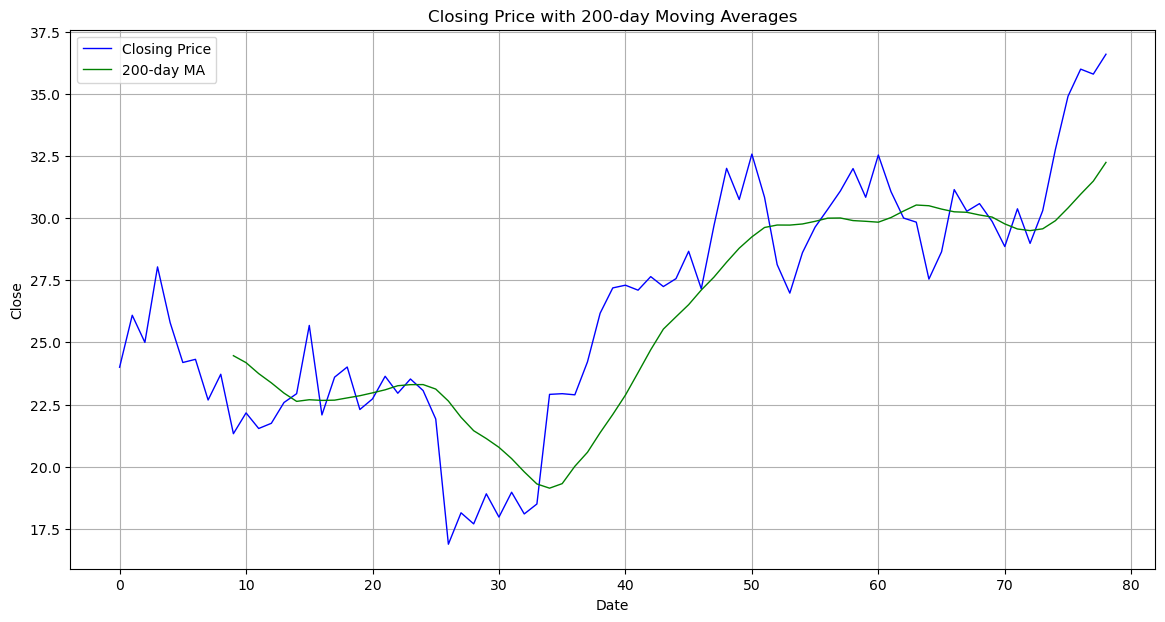

In [9]:
import matplotlib.pyplot as plt

# Plot the Closing Price and 200-day MA
plt.figure(figsize=(14, 7))
plt.plot(final_df.index, final_df['Close'], label='Closing Price', color='blue', linewidth=1)

plt.plot(final_df.index, final_df['200_day_MA'], label='200-day MA', color='green', linewidth=1)

# Adding titles and labels
plt.title('Closing Price with 200-day Moving Averages')
plt.xlabel('Date')
plt.ylabel('Close')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


#### Analysis on moving average
The chart suggests that after an initial downward phase, the stock shows signs of recovery with the closing price moving above the 200-day moving average towards the latter part of the chart, potentially signaling a shift to a more positive outlook. However, when closing price moves too far from the moving average, there is a tendency that it would pullback to a fair value price.

## Exploratory Data Analysis; Relative Strength Index

The RSI is a versatile tool that provides valuable insights into market momentum and potential price movements. By understanding overbought and oversold conditions, spotting divergences, and confirming trend strength, this indicator would prove useful to predict future prices.

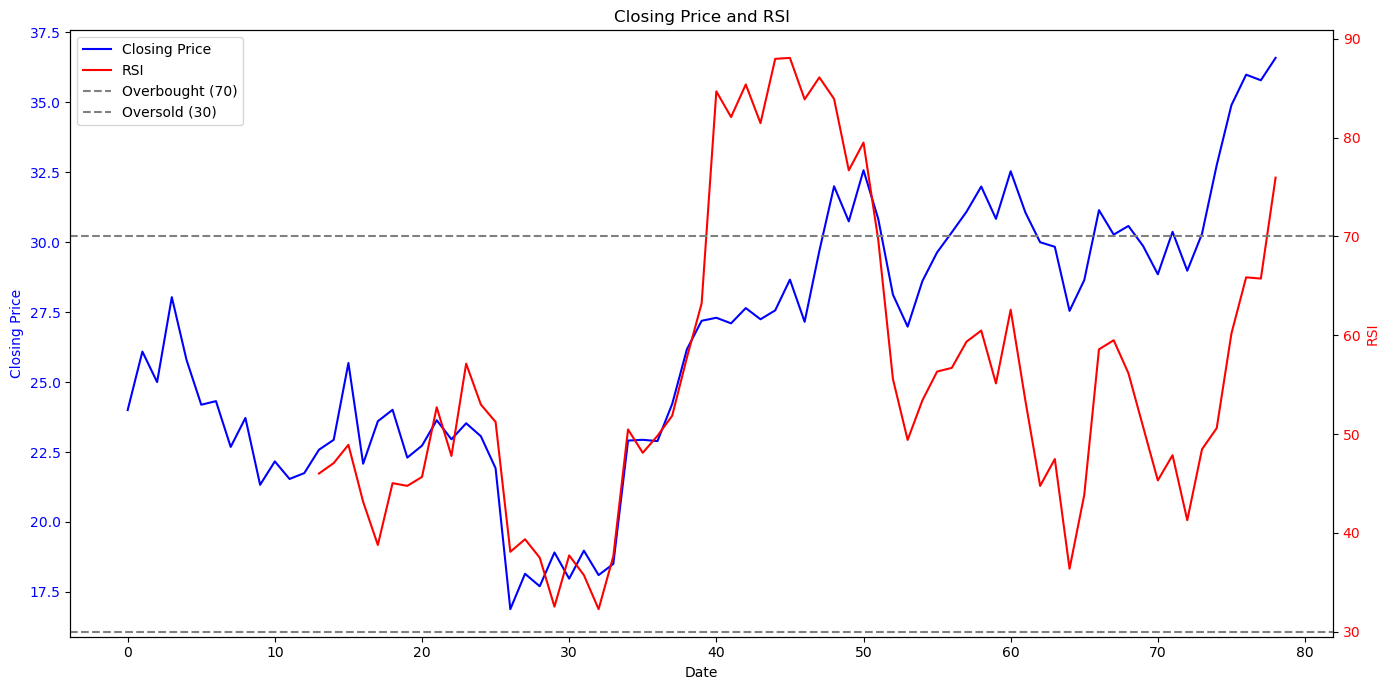

In [10]:
# Create a figure and a set of subplots with two y-axes
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot Closing Price on the primary y-axis
ax1.plot(final_df.index, final_df['Close'], color='blue', label='Closing Price')
ax1.set_xlabel('Date')
ax1.set_ylabel('Closing Price', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a secondary y-axis to plot RSI
ax2 = ax1.twinx()
ax2.plot(final_df.index, final_df['RSI'], color='red', label='RSI')
ax2.set_ylabel('RSI', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add a horizontal line at RSI levels 30 and 70 to indicate overbought/oversold levels
ax2.axhline(70, color='gray', linestyle='--', linewidth=1.5, label='Overbought (70)')
ax2.axhline(30, color='gray', linestyle='--', linewidth=1.5, label='Oversold (30)')

# Add title and legends
plt.title('Closing Price and RSI')
fig.tight_layout()  # To prevent overlap of labels and titles

# Combine legends from both axes
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

# Show the plot
plt.show()


#### Analysis on RSI chart

Noticeable correlations where the RSI peaks precede a drop in the closing price, suggesting that high RSI values are often followed by a downward price correction.

Similarly, low RSI values are often followed by an upward price movement, showing the effectiveness of RSI in identifying potential entry and exit points.

## Exploratory Data Analysis; Time Series Decomposition and Analysis

This helps in understanding the structure and dependencies within the time series data, making it easier to build and fine-tune predictive models.

Insights from the decomposition and autocorrelation plots guide the selection of appropriate model parameters, such as those used in ARIMA or SARIMA models, by highlighting significant patterns and lags in the data.

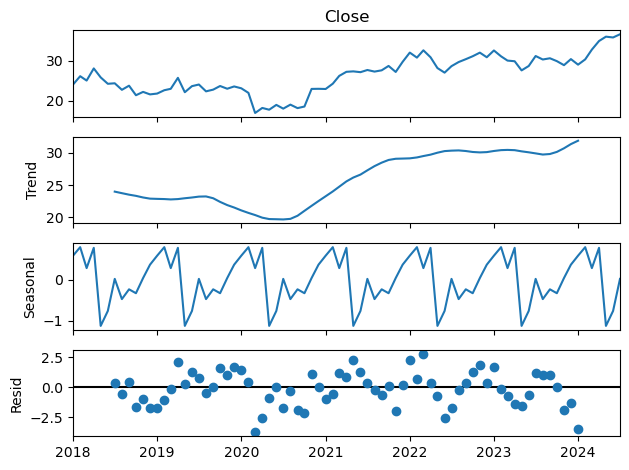

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Decompose the closing price into trend, seasonality, and residuals
decomposition = seasonal_decompose(df['Close'], model='additive', period=12)
decomposition.plot()
plt.show()

#### Analysis on the seasonality

The seasonal component in your data necessitates using a model that can handle seasonal variations explicitly to improve prediction accuracy and better understand the cyclical nature of the series.

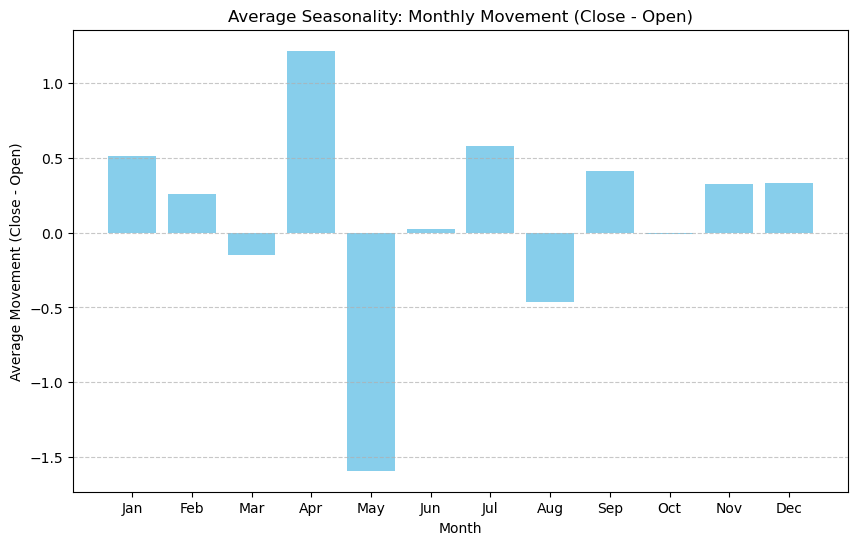

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Plotting the average monthly movement using a bar chart
plt.figure(figsize=(10, 6))
plt.bar(average_monthly_movement.index, average_monthly_movement.values, color='skyblue')
plt.title('Average Seasonality: Monthly Movement (Close - Open)')
plt.xlabel('Month')
plt.ylabel('Average Movement (Close - Open)')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                                       'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()